### 1. Installation

#### 1.1. Install packages

In [ ]:
# Package to handle imbalanced data
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


#### 1.2. Import libraries

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Libraries for numerical operations, data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
# Libraries for handling imbalanced data
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Libraries for handling skewed data distribution
from scipy.stats import skew
from scipy.stats import yeojohnson

# Libraries for model selection (classifiers)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries for model evaluation (cross-validation , evaludation metrics)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import f1_score, make_scorer

# Libraries to ignore warnings
import warnings as wr
wr.filterwarnings("ignore")

### 2. Explotary Data Analysis (EDA)

#### 2.1. Load the datasets

In [ ]:
# Load the datasets
# <encoding> = "utf-8" ensures interpretation of text data be encoded properly
df_train = pd.read_csv("/content/drive/MyDrive/RMIT/Sem A 2024/ML/ASM1/data_train.csv", encoding="utf-8")  # used for training and choosing the best classifier
df_test = pd.read_csv("/content/drive/MyDrive/RMIT/Sem A 2024/ML/ASM1/data_test.csv", encoding="utf-8")    # used for predicting un-seen data

In [ ]:
# Show the shape (rows, columns) of both datasets
print(df_train.shape)
print(df_test.shape)

(202944, 25)
(50736, 25)


In [ ]:
# Show the first 5 columns of the training set
df_train.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [ ]:
# Show the first 5 columns of the testing dataset
df_test.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


In [ ]:
# Remove the column "Id" since it serves as identifier, and does not contribute to further data analysis
# <axis> = 1: indicates the column-axis removal
df_train = df_train.drop("Id", axis=1)

#### 2.2. Descriptive Statistics

In [ ]:
# Show characteristics of columns in the training set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-n

There is no missing value found, and all columns are in `int64` data type, indicating that the whole columns in the training dataset have already been encoded into numerical values.

In [ ]:
# Let 's quickly capture an overview of the training dataset by examining the count, mean, standard deviation (std), minimum,
# 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum of the columns.
# <.T>: to transpose the matrix for better view
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,202944.0,0.428700,0.494891,0.0,0.0,0.0,1.0,1.0
HighChol,202944.0,0.424344,0.494244,0.0,0.0,0.0,1.0,1.0
CholCheck,202944.0,0.962655,0.189607,0.0,1.0,1.0,1.0,1.0
BMI,202944.0,28.379824,6.612738,12.0,24.0,27.0,31.0,98.0
Smoker,202944.0,0.442634,0.496700,0.0,0.0,0.0,1.0,1.0
Stroke,202944.0,0.040844,0.197929,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,202944.0,0.094391,0.292372,0.0,0.0,0.0,0.0,1.0
PhysActivity,202944.0,0.756302,0.429313,0.0,1.0,1.0,1.0,1.0
Fruits,202944.0,0.635372,0.481327,0.0,0.0,1.0,1.0,1.0
Veggies,202944.0,0.811519,0.391096,0.0,1.0,1.0,1.0,1.0


The above summary statistics of the training dataset provide us several observations and insights regarding the diabetic indicators:


1. Health perception: The analysis suggests that a significant portion of the population is dealing with high blood pressure and cholesterol, while also reporting extremely poor perceptions of their general, mental, and physical health.
* `HighBP` & `HighChol`: Approximately 43% of the population is affected by high blood pressure and high cholesterol.
* `BMI`: The average BMI is around 28.4, indicating that, on average, individuals are overweight (The average is in range 18.5 - 24.9, according to Centers for Disease Control and Prevention)
* `GenHlth`, `MentHlth`, `PhysHlth`: The average scores for general health, mental health, and physical health are 2.5, 3.2, and 4.3 respectively, suggesting extremely poor health perception across these domains.



2. Lifestyle indicators: The majority of individuals in the population exhibit healthy lifestyle indicators such as regular physical activity and a high consumption of fruits and vegetables, while a relatively small portion engages in smoking and heavy alcohol consumption.
* `Smoker`: About 44% of the population are smokers.
* `PhysActivity`: Over 75% of the population engages in physical activity.
* `Fruits`, `Veggies`, `HvyAlcoholConsump`: On average, individuals report consuming fruits and vegetables at a rate of about 63% and 81% respectively, while only 6% of the population reports heavy alcohol consumption.



3. Demographic Characteristics: Demographic characteristics show a balanced gender distribution, with the population having attained relatively high levels of education and income.
* `Sex`: The population is fairly evenly split between genders, with around 44% being male.
* `Education`: The average education level is about 5 out of 6, indicating a high level of education among the population.
* `Income`: The average income level is approximately 6 out of 8.



4. Medical History and Healthcare Access: The majority of the population has access to healthcare and has undergone cholesterol checks, indicating good awareness and access to medical services. However, the negative mean values for ExtraMedTest and ExtraAlcoholTest warrant further investigation.
* `Stroke` & `HeartDiseaseorAttack`: The incidences of stroke and heart disease/attack are relatively low in the population.
* `CholCheck`: Nearly 96% of the population has undergone cholesterol checks.
* `AnyHealthcare` & `NoDocbcCost`: Approximately 95% of the population has access to healthcare, with the majority willing to pay for healthcare services.
* `ExtraMedTest` & `ExtraAlcoholTest`: These features have negative mean values, possibly indicating errors or outliers in the data.

In [ ]:
# Now we group columns in the training dataset into either target, numerical, or categorical variables for further analysis
# Define the target variable
target_variable = "Status"

# Define the numerical variables based on the given list
numerical_variables = ["BMI", "MentHlth", "PhysHlth", "Age", "Education", "ExtraMedTest", "ExtraAlcoholTest"]
print(f"Number of numerical independent variables: {len(numerical_variables)}")

# Extract categorical variables by excluding numerical variables and the target variable
categorical_variables = [feature for feature in df_train.columns if feature not in numerical_variables and feature != target_variable]
print(f"Number of categorical independent variables: {len(categorical_variables)}")

# Identify binary categorical features for further analysis
binary_categorical_variables = [
    feature for feature in categorical_variables
    if df_train[feature].nunique() == 2 and set(df_train[feature].unique()) == {0, 1}
]
print(f"Number of binary categorical independent variables: {len(binary_categorical_variables)}")

Number of numerical independent variables: 7
Number of categorical independent variables: 16
Number of binary categorical independent variables: 14


In summary, after removing the "Id" column, the training dataset includes:
* 202944 data points with no missing values found accross all columns
* 1 dependent variable that falls into either 1 (diabetic) or 0 (non-diabetic)
* 23 independent variables, including a mix of numerical and categorical features. Categorical features may include binary variables, ordinal variables, and other categorical variables with multiple levels."

Additional observations:
* The columns `ExtraMedTest` and `ExtraAlcoholTest` have values that are out of the upper and lower boundaries that are mentioned in the code book. In further analysis steps, we will have to take neccessary actions to handle if they are outliers.

#### 2.3. Handle duplicates

In [ ]:
# Identify duplicate data points
num_duplicates = df_train.duplicated().sum()
print("Number of duplicate rows found:", num_duplicates)

# By removing duplicates from the dataset
# we can prevent inflated weights or biases towards repeated observations
# thereby, ensure the reliability of statistical analyses
print("Shape of the training dataset before removing duplicates: ", df_train.shape)
df_train.drop_duplicates(inplace=True)
print("Shape of the training dataset after removing duplicates: ", df_train.shape)

Number of duplicate rows found: 208
Shape of the training dataset before removing duplicates:  (202944, 24)
Shape of the training dataset after removing duplicates:  (202736, 24)


#### 2.4. Relationships between variables

Before delving deep into further data analysis and transformation, it is essential to understand the nature of the dataset by examining the relationship between independent variables, and between independent and target variables

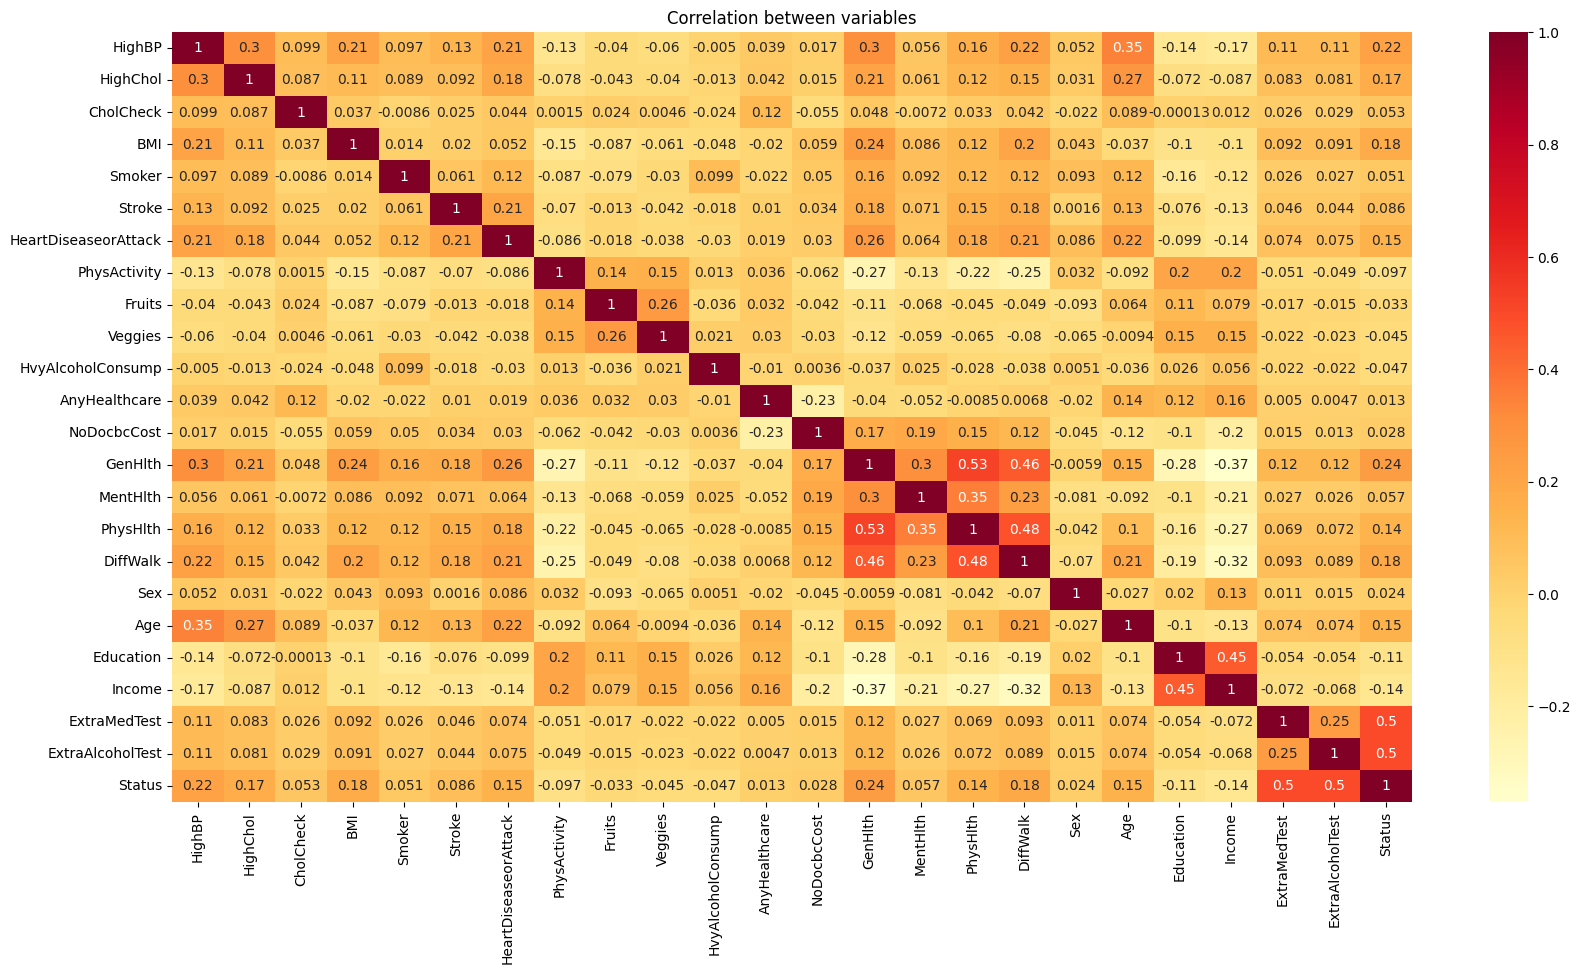

In [ ]:
# Plot the heatmap to see correlation between variables
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation between variables");

##### 2.4.1. Relationships between independent variables
* Positive correlations: There are positive correlations between variables such as HighBP and HighChol (0.29), HighBP and HeartDiseaseorAttack (0.21), HighChol and HeartDiseaseorAttack (0.18). This suggests that individuals with high blood pressure are more likely to have high cholesterol and a history of heart disease or heart attack.

* Negative correlations: PhysActivity shows negative correlations with BMI (-0.14), GenHlth (-0.26), and DiffWalk (-0.25). This implies that individuals who engage in physical activity are likely to have lower BMI, better general health, and less difficulty walking or climbing stairs.

##### 2.4.2. Relationships between independent & dependent variables

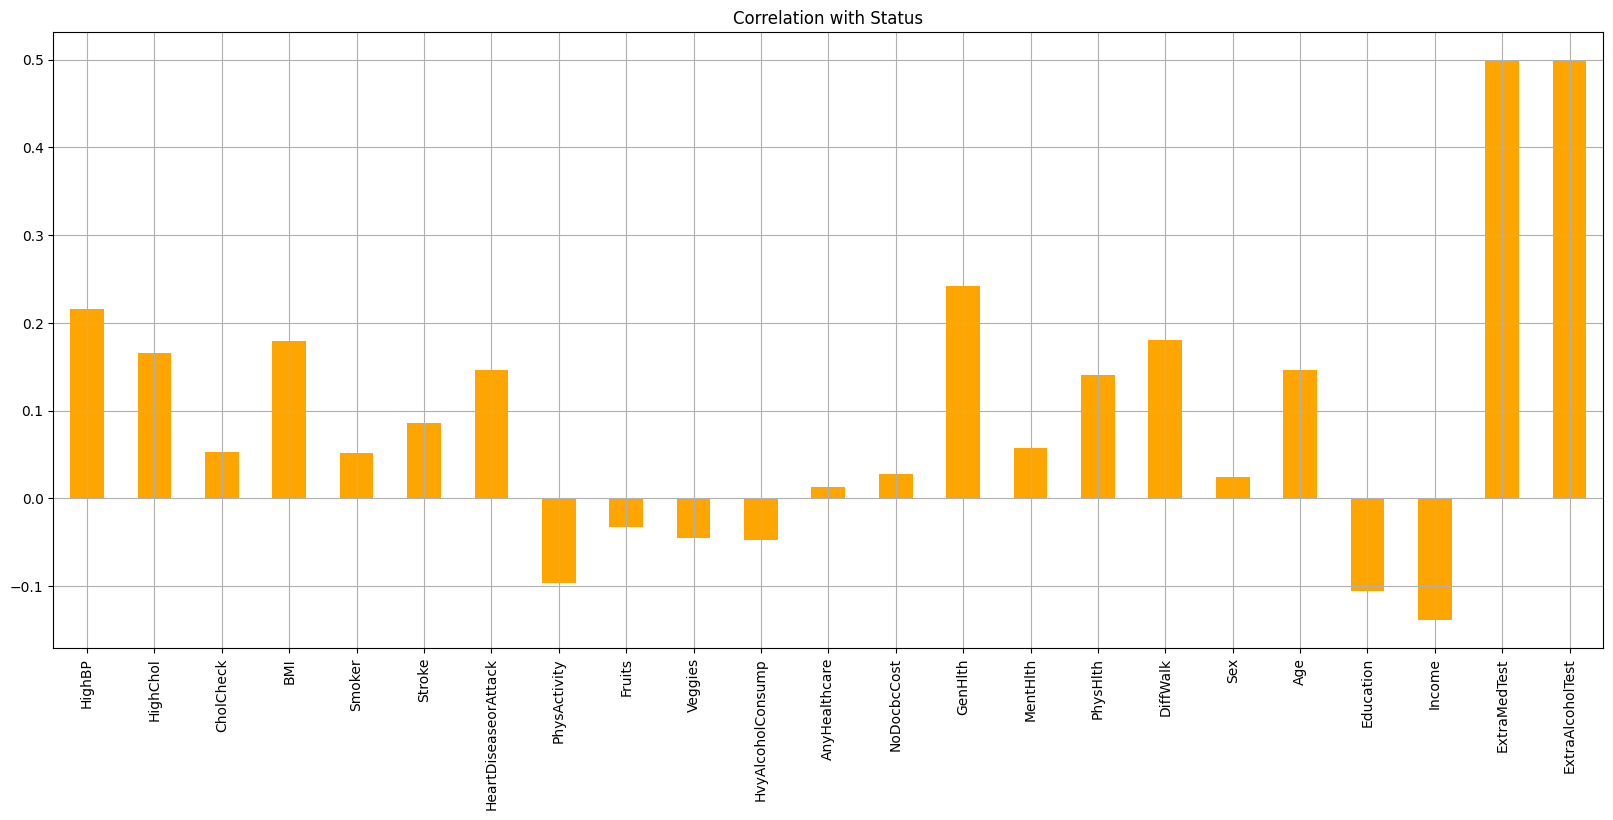

In [ ]:
df_train.drop('Status', axis=1).corrwith(df_train.Status).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Status",color="Orange");

* ExtraMedTest & ExtraAlcoholTest are strongly positively correlated with Status
* AnyHealthcare , Sex, Fruits and NoDocbccost  are least correlated with Status.
* HighBP , HighChol , BMI , HeartDiseaseorAttack , GenHlth , PhysHlth , Age , Income and DiffWalk have a moderate correlation with Status.

In addition to the above observations, we can also draw interesting conclusions that:
* Variables related to lifestyle choices, such as smoking and heavy alcohol consumption, show relatively weaker correlations with Status compared to medical history indicators like high blood pressure and high cholesterol.
* Age appears to have a significant positive correlation with Status, indicating that older individuals are more likely to have prediabetes or diabetes.

In [ ]:
# We will use Pearson correlation, a statistical measure quantifying the linear relationship between two continous variables,
# to understand how changes in one variable are associated with changes in another one.
pear_coor = (df_train.drop('Status', axis=1)
   .corrwith(df_train.Status)
   .abs()
   .sort_values(ascending=False))
pear_coor

ExtraMedTest            0.499347
ExtraAlcoholTest        0.498840
GenHlth                 0.241794
HighBP                  0.216337
DiffWalk                0.180833
BMI                     0.178761
HighChol                0.166069
Age                     0.146507
HeartDiseaseorAttack    0.145735
PhysHlth                0.140483
Income                  0.138789
Education               0.106113
PhysActivity            0.096784
Stroke                  0.086334
MentHlth                0.057365
CholCheck               0.052937
Smoker                  0.051436
HvyAlcoholConsump       0.046922
Veggies                 0.045145
Fruits                  0.032558
NoDocbcCost             0.028107
Sex                     0.024242
AnyHealthcare           0.012567
dtype: float64

- Among features above, those with correlation coefficients below 0.05 are considered less influential predictors
- Removing such features will:
  * reduce computation complexity
  * ensure the model is more interpretable and general to unseen data
  * reduce the likelihood of learning noises and irrelevant patterns, thus mitigate overfitting propability
- Now, I temporarily define the features to be dropped. Once completing the explotary analysis on features, we will drop them.

In [ ]:
# Define a threshold for correlation strength
drop_variables_threshold = 0.05

# Features with correlation coefficients below 0.05 are considered less influential predictors
dropped_variables = pear_coor[pear_coor < drop_variables_threshold].index

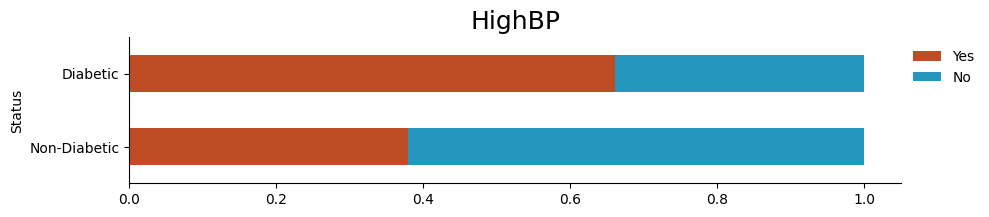

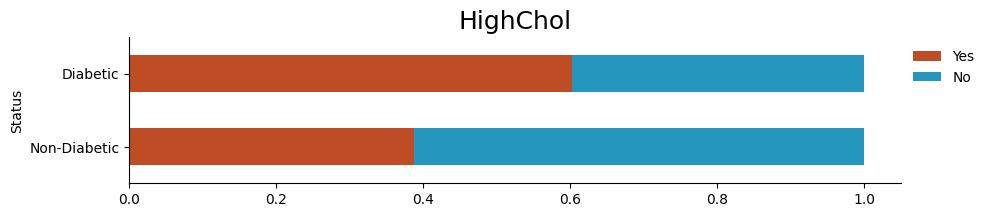

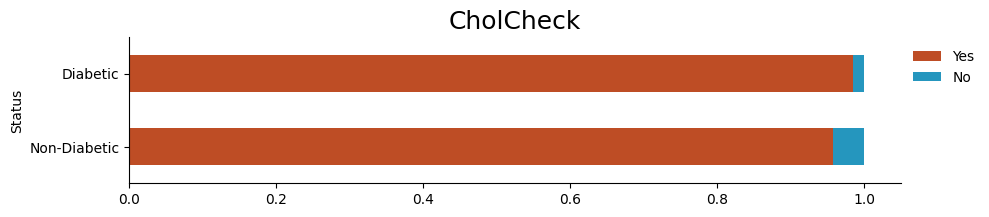

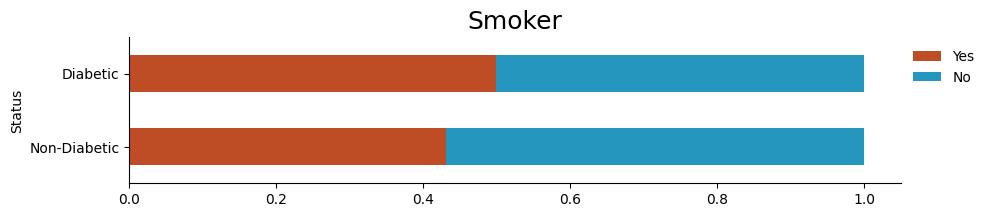

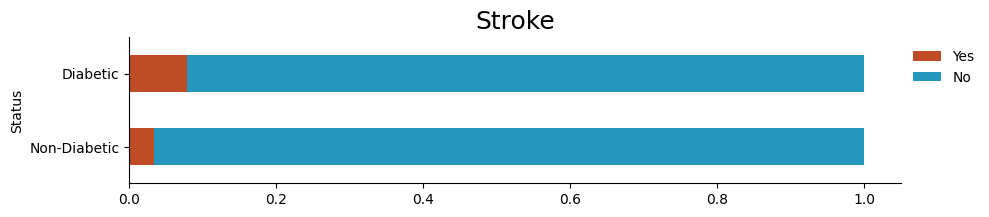

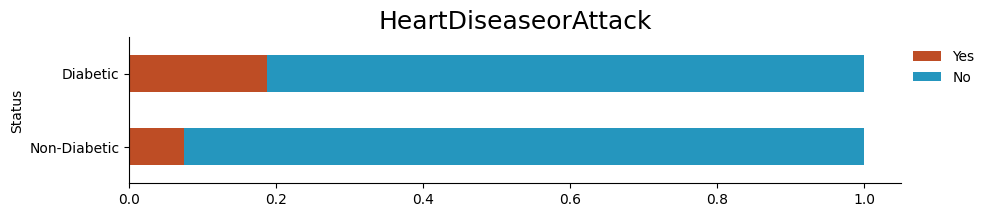

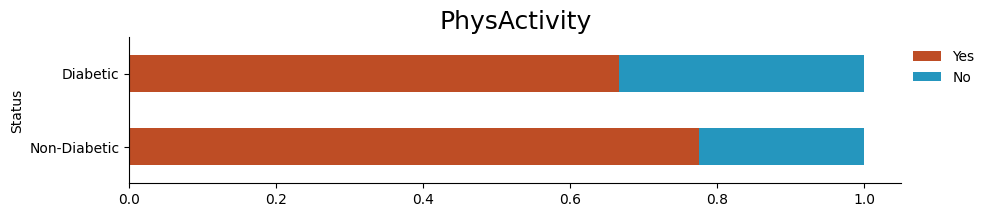

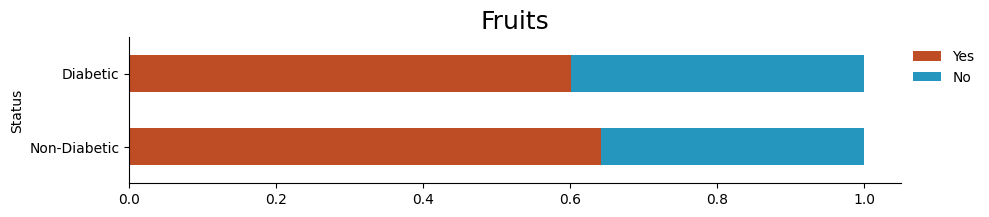

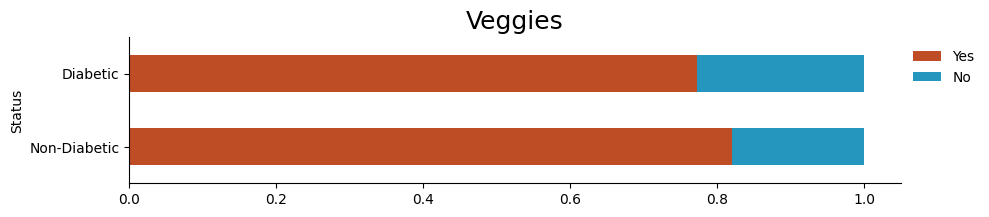

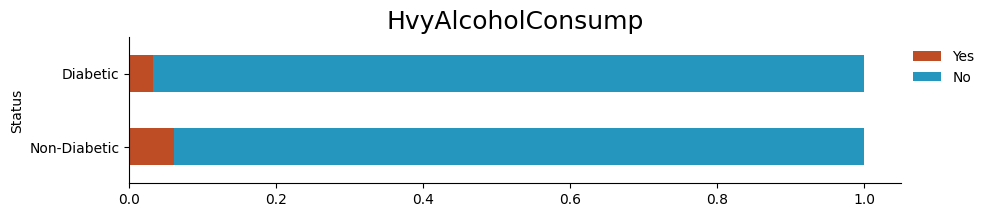

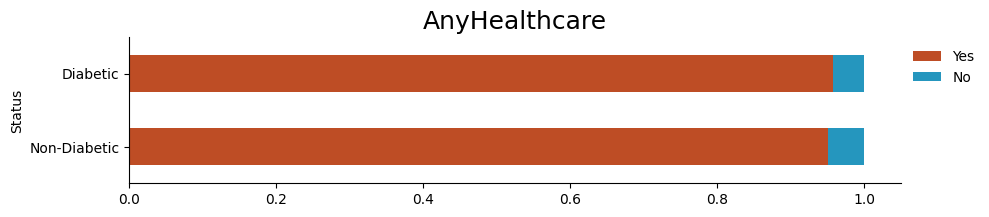

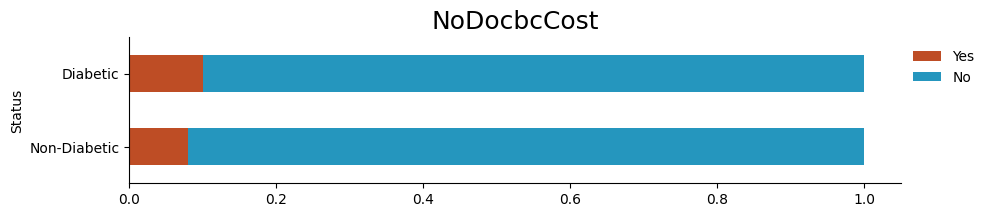

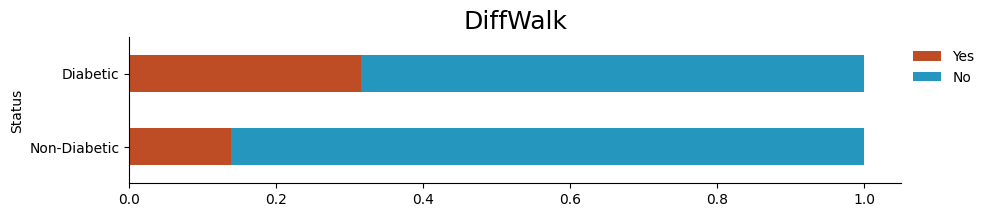

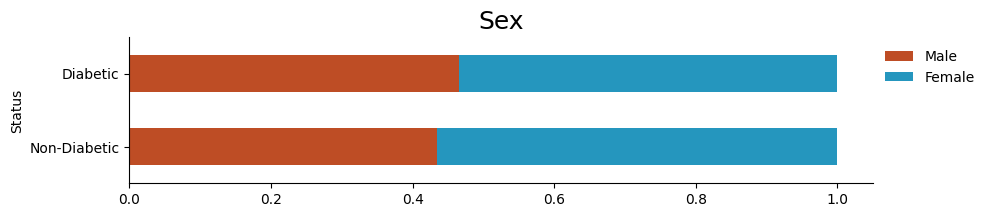

In [ ]:
colors = ['#be4d25','#2596be']
def analyse_cat(var):
    (df_train.groupby('Status')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    if (var == "Sex"):
      plt.legend(['Male', "Female"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    else:
      plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

for binary_categorical_variable in binary_categorical_variables:
    analyse_cat(binary_categorical_variable)

The above charts provides insights into how each categorical variable might influence the target variable ("Status" - diabetic or non-diabetic). Specifically:
* both Males and females are equally vulnerable to diabetes.
* Both smokers and non-smokers are equally vulnerable to Diabetes
The above charts illustrate that:
* People older than 45 are more vulnerable to diabetes than younger ones, indicating that as age increases, the likelihood of being diabetic also increases.

* The higher the education level, the lower the risk of suffering from diabetes.

* People with lower income have a higher risk of diabetes than those with higher incomes.

#### 2.5. Data Distribution


After grasping an overview of variables and their correlations, it's imperative to dive deeper into understanding how the data is distributed. In this section, we'll take a closer look at the distribution of both the target variable and categorical variables through bar charts, while examining the distribution of numerical variables using histograms. This detailed analysis will provide a clearer understanding of the dataset's characteristics.

##### 2.5.1. Distribution of target variable

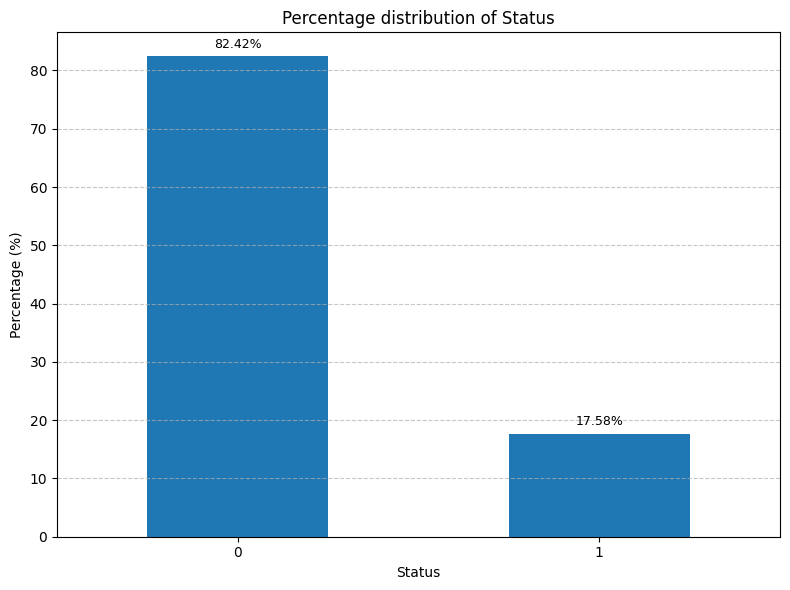

In [ ]:
# Compute the percentage distribution
percentage_distribution = df_train['Status'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(8, 6))
percentage_distribution.plot(kind='bar')
plt.title('Percentage distribution of Status')
plt.xlabel('Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Add labels for each bar
for i, val in enumerate(percentage_distribution):
    plt.text(i, val + 1, f'{val:.2f}%', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The above bar chart indicates a strong imbalance of training dataset, in which the percentage of individuals with diabetes approximately 4 times outweights the non-diabetes ones. That raises a critical concern on our model selection and performance evaluation steps that we will discuss later in this notebook.

##### 2.5.2. Distribution of categorical variables
To explore distribution of categorical variables, we use bar chart with the x and y axises represents the categorical values and their corresponding frequency respectively

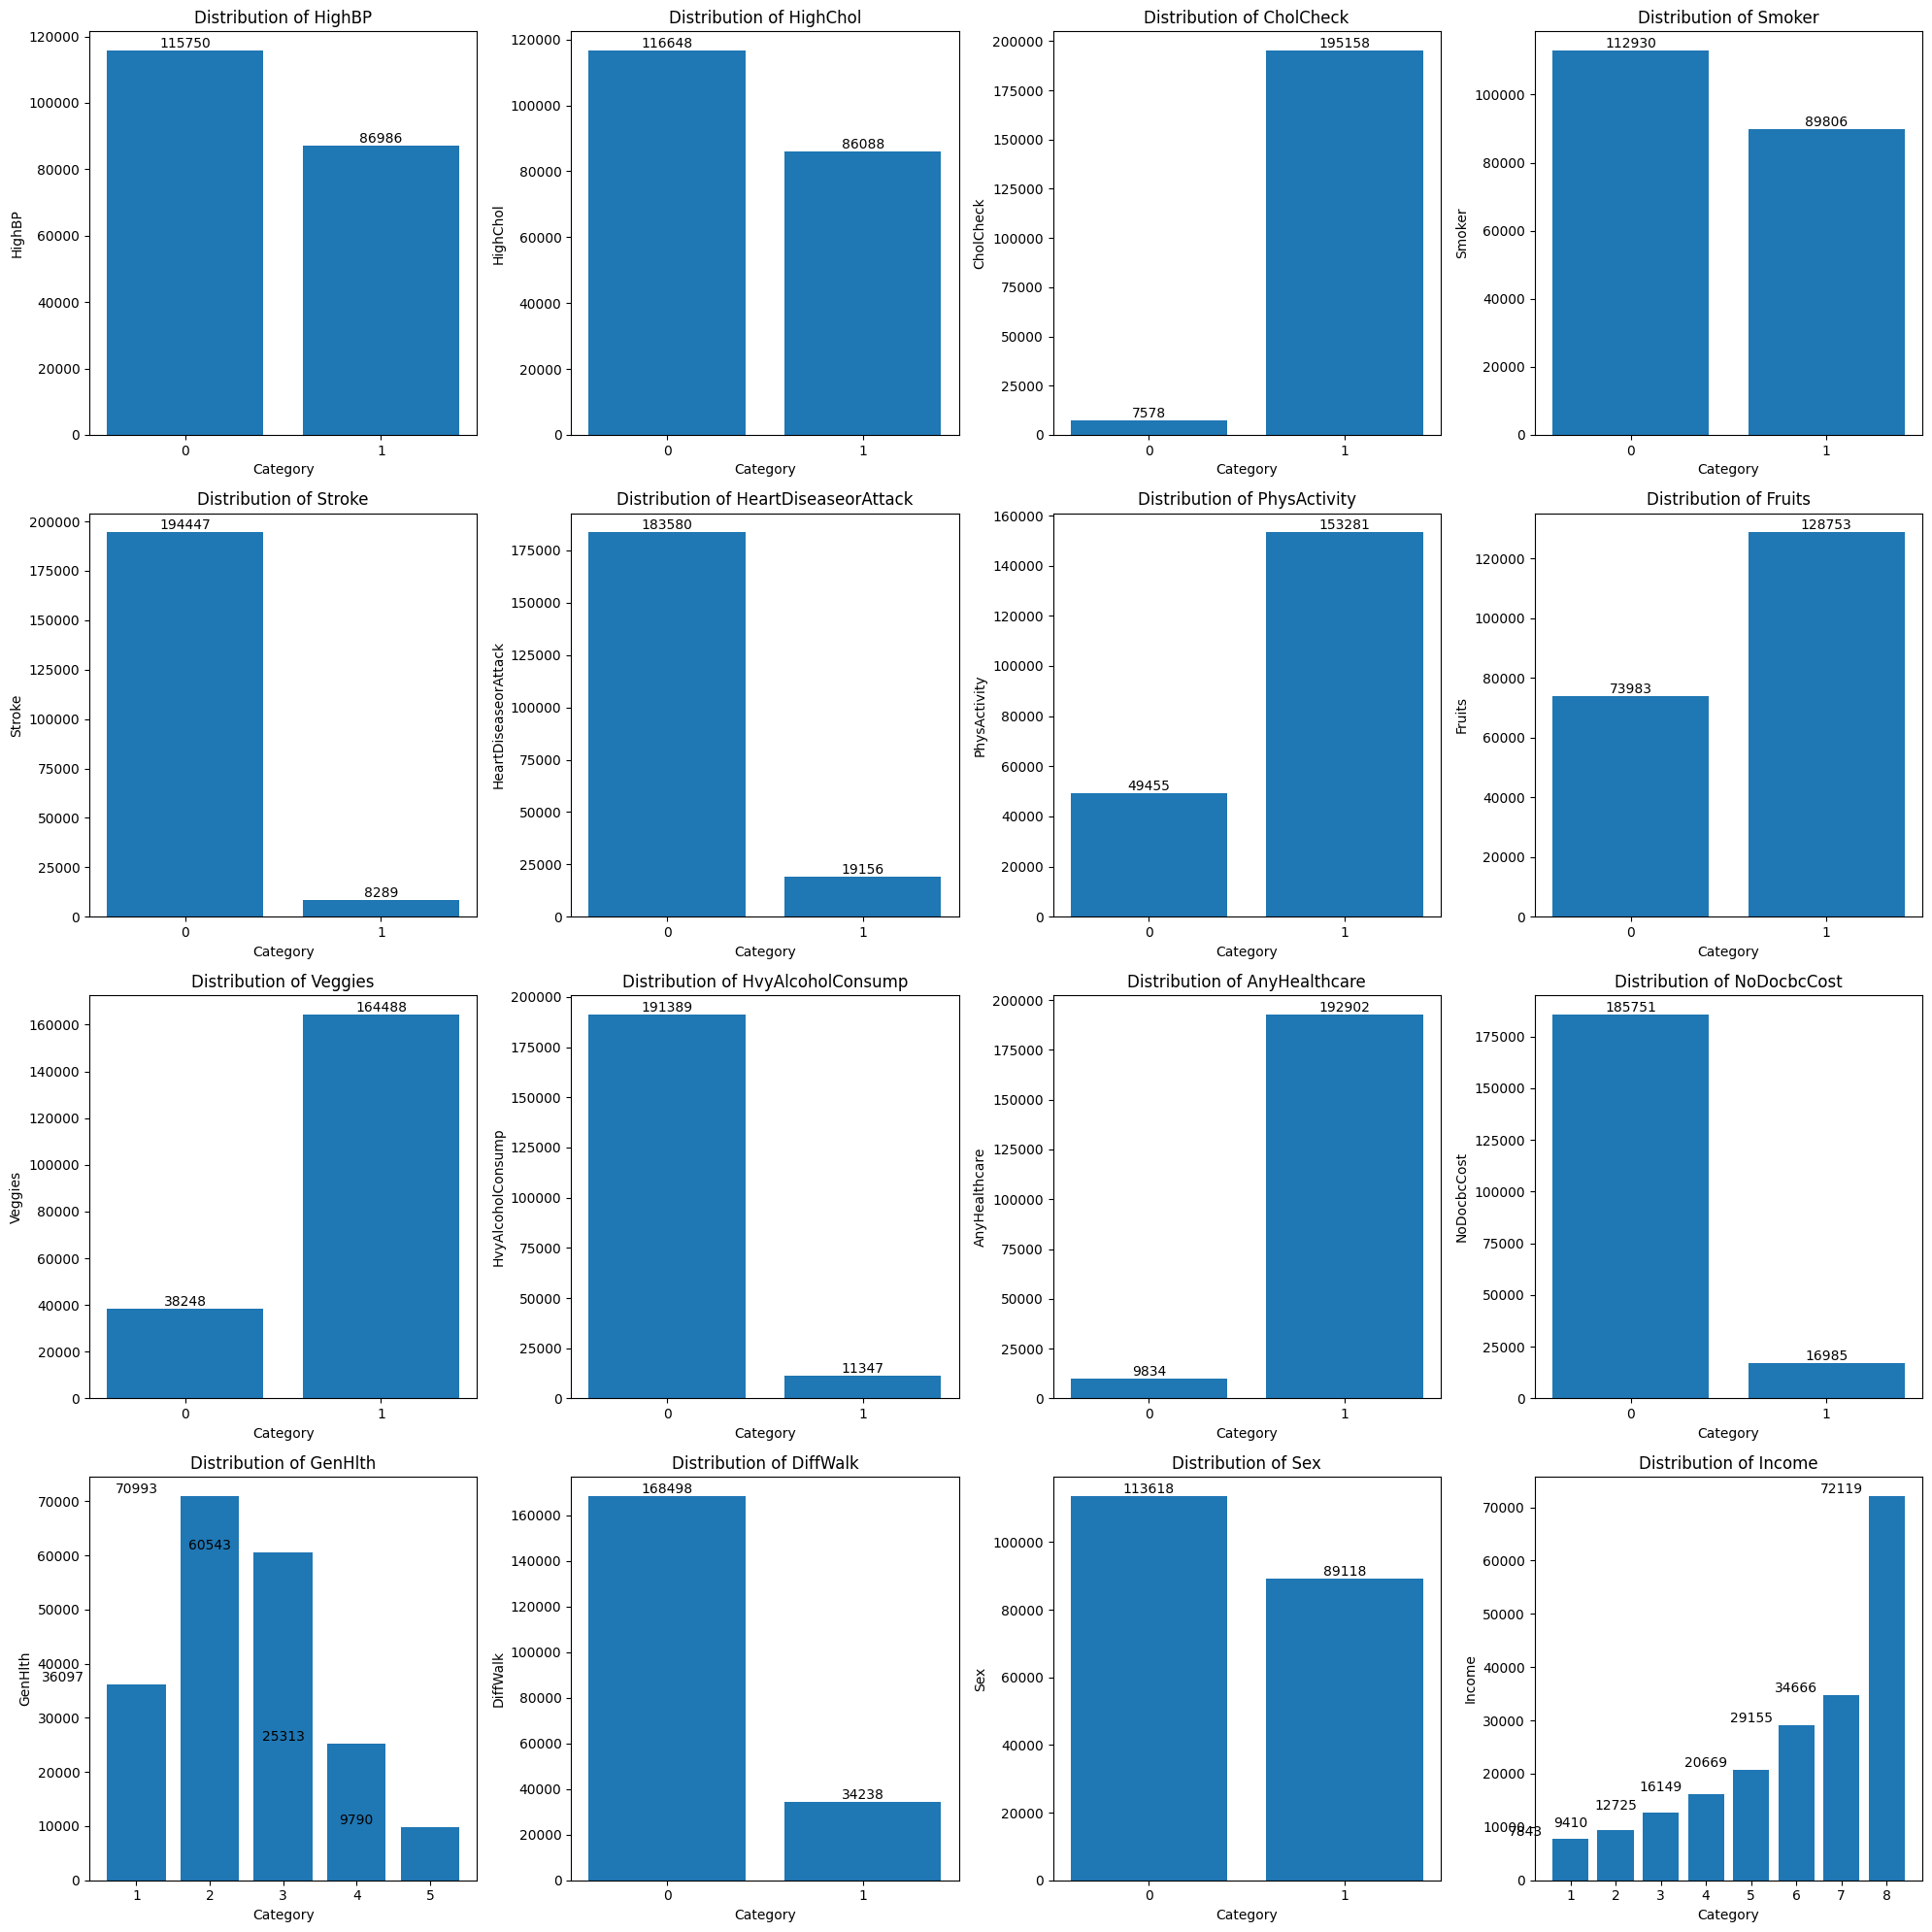

In [ ]:
# Create a 5 x 4 figure grid
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

# Flatten the axes to iterate over them
axs = axs.flatten()

# Plot bar chart for each categorical variable
for i, var in enumerate(categorical_variables):
    # Count occurrences of each category
    counts = df_train[var].value_counts().sort_index()

    # Plot bar chart
    if len(counts) == 2:  # Check if binary categorical variable
        axs[i].bar(counts.index.astype(str), counts.values)  # Assuming binary categories are represented by 0 and 1
        axs[i].set_xticks(counts.index)
    else:
        axs[i].bar(counts.index, counts.values)

    axs[i].set_title(f'Distribution of {var}')
    axs[i].set_xlabel("Category")
    axs[i].set_ylabel(var)

    # Annotate each bar with its count value
    for index, value in enumerate(counts.values):
        axs[i].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

##### 2.5.3. Distribution of numerical variables

In [ ]:
df_train[numerical_variables].describe()

,BMI,MentHlth,PhysHlth,Age,Education,ExtraMedTest,ExtraAlcoholTest
count,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000
mean,28.383844,3.200251,4.260782,8.038513,5.049384,-7.416438,-7.566027
std,6.614264,7.430349,8.740095,3.052012,0.985668,76.031037,75.964939
min,12.000000,0.000000,0.000000,1.000000,1.000000,-199.000000,-199.000000
25%,24.000000,0.000000,0.000000,6.000000,4.000000,-55.000000,-55.000000
50%,27.000000,0.000000,0.000000,8.000000,5.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000,10.000000,6.000000,40.000000,40.000000
max,98.000000,30.000000,30.000000,13.000000,6.000000,199.000000,199.000000


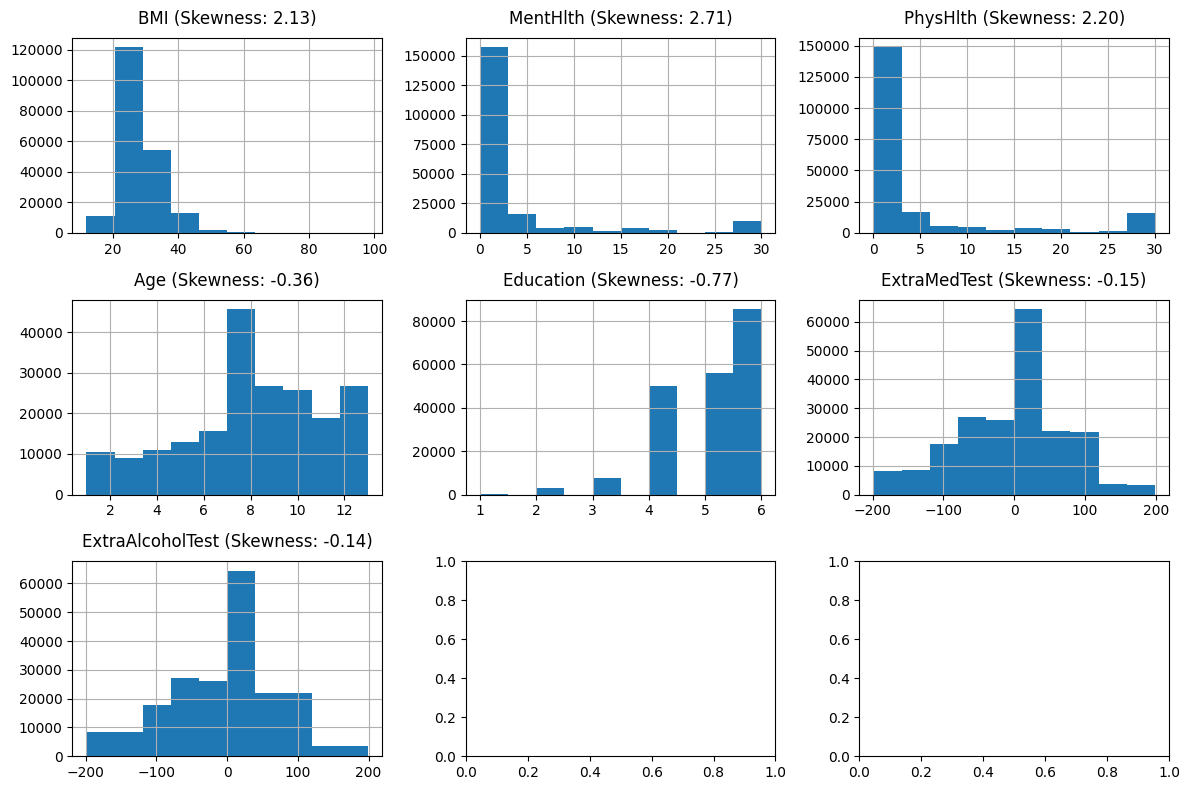

In [ ]:
# Prepare a 3x2 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for specified numerical columns and print skewness and title of each feature
skewness_before_normalization = []
for i, col in enumerate(numerical_variables):
    skewness = skew(df_train[col].dropna())
    df_train[col].hist(ax=axes[i])
    skewness_before_normalization.append([col, skewness])
    axes[i].set_title(f'{col} (Skewness: {skewness:.2f})', pad=10)  # Set title with padding
    axes[i].set_xlabel('')  # Remove x-label to avoid overlapping

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Print skewness each feature before normalization
skewness_df = pd.DataFrame(skewness_before_normalization, columns=['Feature', 'Skewness before normalization'])
skewness_df

,Feature,Skewness before normalization
0,BMI,2.128642
1,MentHlth,2.713242
2,PhysHlth,2.199350
3,Age,-0.360907
4,Education,-0.774172
5,ExtraMedTest,-0.145355
6,ExtraAlcoholTest,-0.141193


The above plots provide us insights about distribution and corresponding skewness of numerical variables:
* `BMI`: Right-skewed (Skewness = 2.13) - Indicates most individuals have lower BMI values, with a few having very high values.

* `MentHlth`: Heavily right-skewed (Skewness = 2.71) - Suggests most individuals have good mental health, with a few reporting very low scores.

* `PhysHlth`: Heavily right-skewed (Skewness = 2.20) - Similar to mental health, indicating most individuals have good physical health, with some reporting very low scores.

* `Education`: Left-skewed (Skewness = -0.77) - Indicates a higher frequency of individuals with higher education levels, suggesting that most surveyed individuals have completed education beyond high school.

* `Age`: Mildly left-skewed (Skewness = -0.36) - Suggests a slightly higher concentration of younger individuals compared to older ones.

* `ExtraMedTest` & `ExtraAlhocolTest`: Slightly left-skewed (Skewness = -0.14) - The distribution of these numerical features are nearly symmetrical, suggesting a relatively balanced spread of values.

There are some highly skewed numerical features that need to be normalized, particularly `BMI`, `MentHlth`, and `PhysHlth`. We will employ the Yeo-Johnson transformation, a generalization of the Box-Cox transformation. The capability to handle both positive and negative values in a symmetric and closer to normal distribution is the key advantage that explains why we should choose it for the task of normalization in this scenario.

In [ ]:
# Highly skewed numerical columns to be normalized
skewed_cols = ['BMI', 'MentHlth', 'PhysHlth']

# Apply Yeo-Johnson transformation to skewed numerical columns
for col in skewed_cols:
    transformed_data, _ = yeojohnson(df_train[col])
    df_train[col] = transformed_data

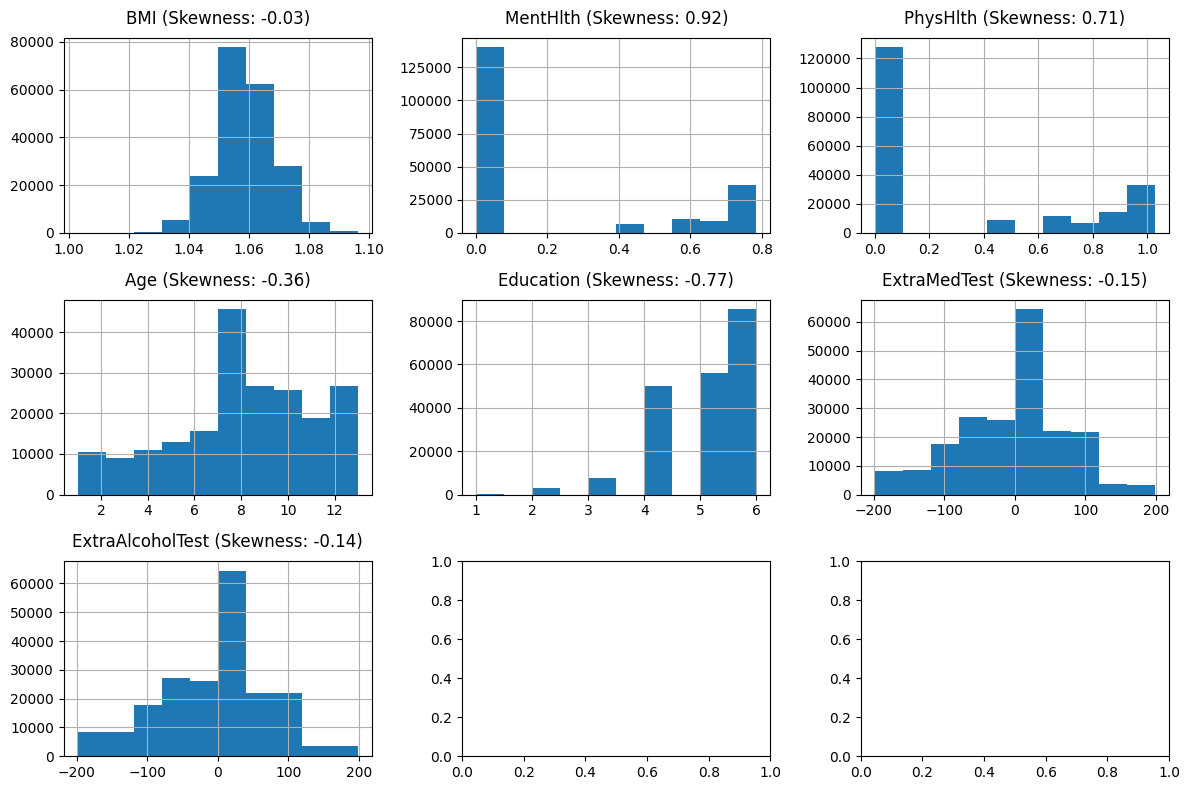

In [ ]:
# Prepare a 3x2 grid for the plots after normalization
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for specified numerical columns after normalization and print skewness and title of each feature
skewness_after_normalization = []
for i, col in enumerate(numerical_variables):
    skewness = skew(df_train[col].dropna())
    df_train[col].hist(ax=axes[i])
    skewness_after_normalization.append([col, skewness])
    axes[i].set_title(f'{col} (Skewness: {skewness:.2f})', pad=10)  # Set title with padding
    axes[i].set_xlabel('')  # Remove x-label to avoid overlapping

# Adjust the layout and display the plot after normalization
plt.tight_layout()
plt.show()

In [ ]:
# Print skewness each feature after normalization
skewness_df_after = pd.DataFrame(skewness_after_normalization, columns=['Feature', 'Skewness after normalization'])
print("Skewness after normalization:")
skewness_df_after

Skewness after normalization:


,Feature,Skewness after normalization
0,BMI,-0.025564
1,MentHlth,0.917112
2,PhysHlth,0.707473
3,Age,-0.360907
4,Education,-0.774172
5,ExtraMedTest,-0.145355
6,ExtraAlcoholTest,-0.141193


#### 2.6. Handle outliers

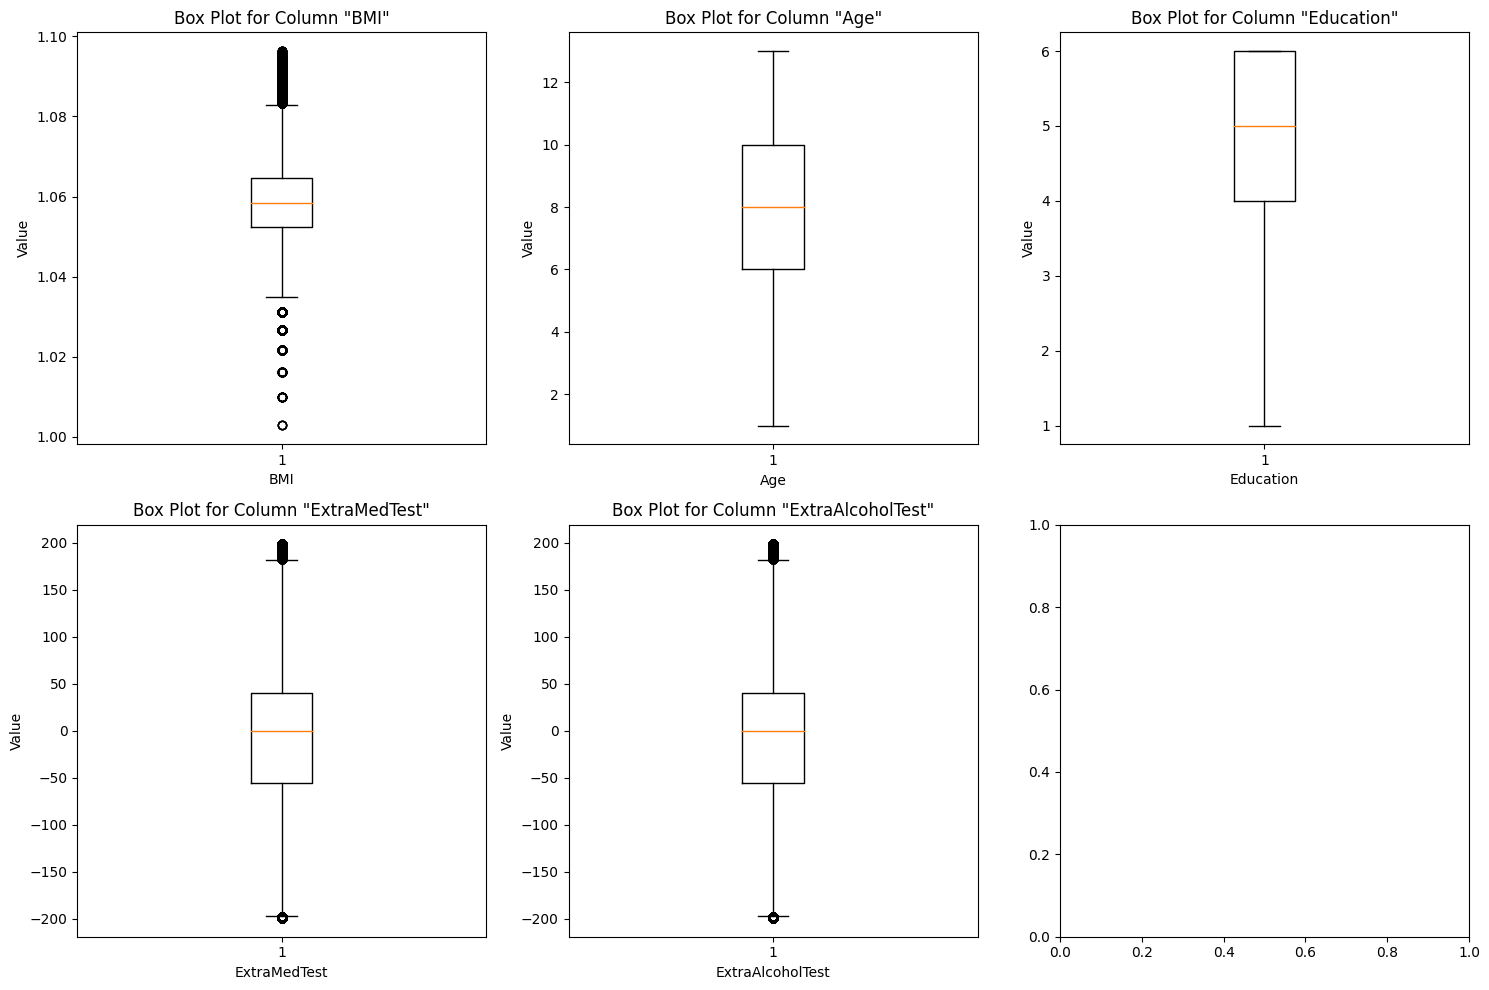

In [ ]:
# Function to detect outliers using winsorization
def detect_outliers(df_train, alpha=0.05):
    lower_bound = df_train.quantile(alpha/2)
    upper_bound = df_train.quantile(1 - alpha/2)
    outliers = (df_train < lower_bound) | (df_train > upper_bound)
    return outliers

# Function to winsorize outliers
def winsorize(df_train, alpha=0.05):
    lower_bound = df_train.quantile(alpha/2)
    upper_bound = df_train.quantile(1 - alpha/2)
    df_train[df_train < lower_bound] = lower_bound
    df_train[df_train > upper_bound] = upper_bound
    return df_train

# Detect outliers
outliers = detect_outliers(df_train)

# Plot box plots for columns with outliers
outlier_columns = outliers.any()
outlier_columns = outlier_columns[outlier_columns == True].index.tolist()

# Calculate the grid dimensions
num_plots = len(outlier_columns)
num_rows = (num_plots + 2) // 3  # Ensure at least 2 rows, 3 columns
num_cols = min(num_plots, 3)

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = np.array(axes).reshape(1, -1)

# Plot box plots
for i, column in enumerate(outlier_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    ax.boxplot(df_train[column])
    ax.set_title(f'Box Plot for Column "{column}"')
    ax.set_xlabel(column)
    ax.set_ylabel('Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

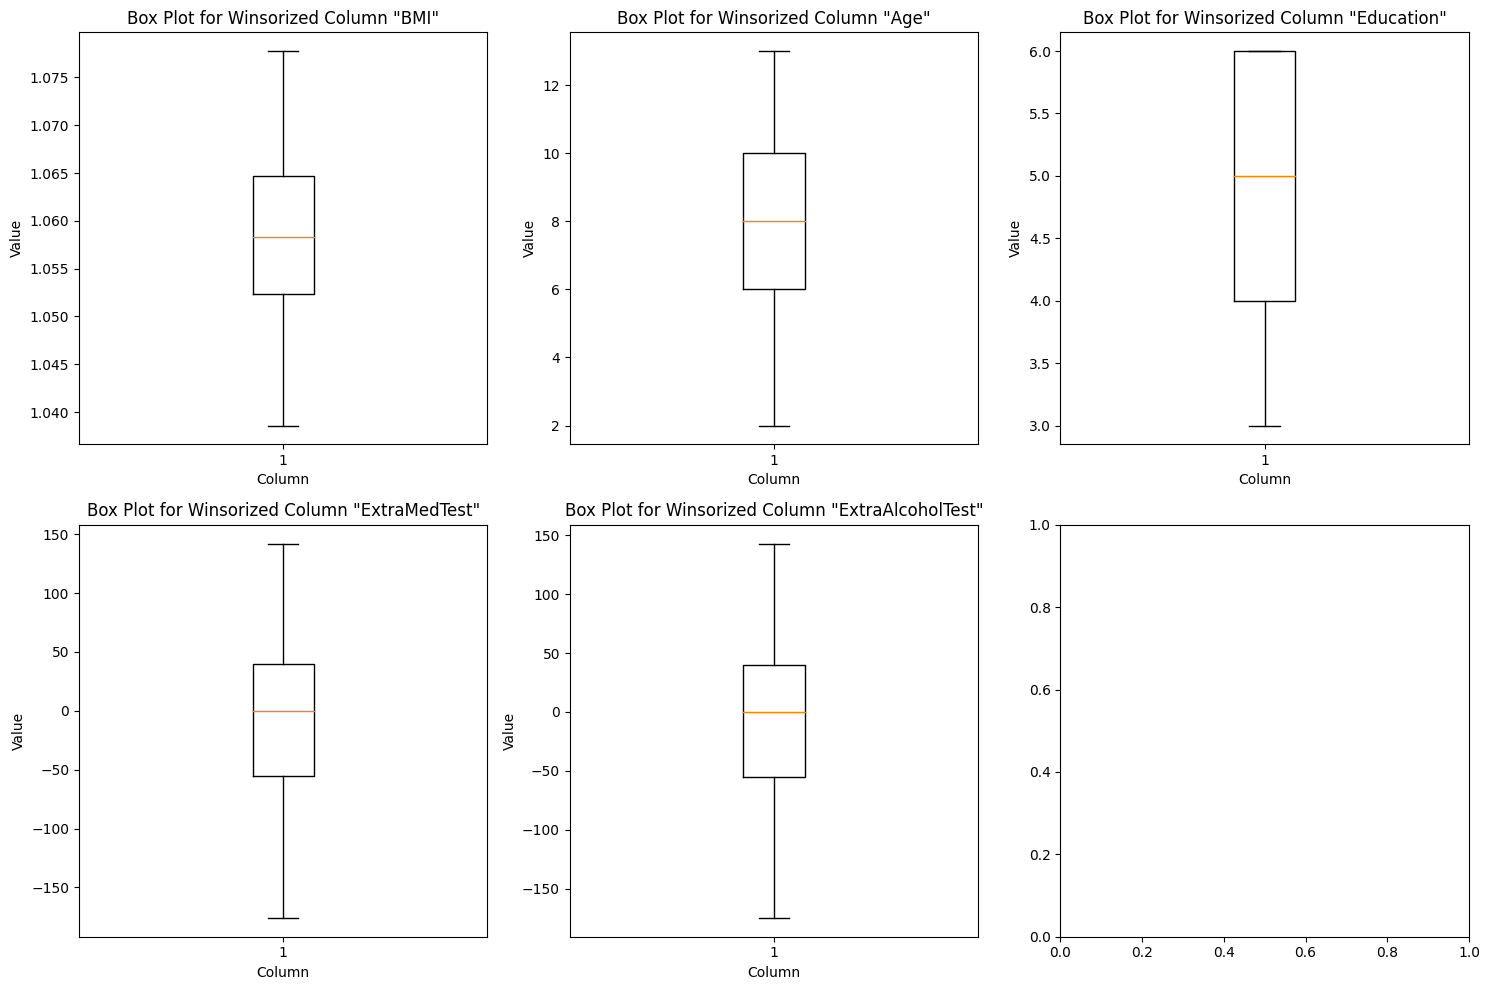

In [ ]:
# Winsorize outliers
df_train_winsorized = df_train.copy()
for column in outlier_columns:
    df_train_winsorized[column] = winsorize(df_train_winsorized[column])

# Plot box plots for winsorized columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = np.array(axes).reshape(1, -1)

# Plot box plots for winsorized columns
for i, column in enumerate(outlier_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    ax.boxplot(df_train_winsorized[column])
    ax.set_title(f'Box Plot for Winsorized Column "{column}"')
    ax.set_xlabel('Column')
    ax.set_ylabel('Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### 4. Model Implementation
In this section, we will apply K-Fold cross-validation on 3 classifiers

#### 4.1. Splitting training dataset into train set, validation set, and test set

In [ ]:
df_train = df_train.drop(dropped_variables, axis=1)
df_train_X = df_train.drop(['Status'], axis=1)
df_train_y = df_train[['Status']]

# Splitting data into train set and test set
train_X, val_X, train_y, val_y = train_test_split(df_train_X, df_train_y, test_size=0.2, shuffle=True)
print("Splitting the training dataset into training set and testing set")
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y .shape)

Splitting the training dataset into training set and testing set
(162188, 17)
(40548, 17)
(162188, 1)
(40548, 1)


#### 4.2. Evaluation Framework

Before delving deep into further detailed implementation, let's break down each evaluation metric and its significance:

* `Accuracy`: Accuracy measures the overall correctness of the model, calculated as the ratio of correctly predicted instances to the total instances. It's useful for balanced datasets but can be misleading for imbalanced datasets.

* `Recall (Sensitivity)`: Recall measures the ability of the model to correctly identify positive instances out of all actual positive instances. It helps in capturing all positive cases, minimizing false negatives.

* `Precision`: Precision measures the ability of the model to correctly identify positive instances out of all predicted positive instances. It helps in minimizing false positives.

* `F1-score`: F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. By consider both false positives and false negative, F1-score is particularly useful in this context due to the strong imbalanced distribution present in the given dataset.

Terminologies used:
* `True Positive (TP)`: Correctly identified individuals with diabetes or prediabetes.
* `True Negative (TN)`: Correctly identified individuals without diabetes.
* `False Positive (FP)`: Incorrectly identified individuals as having diabetes or prediabetes when they do not.
* `False Negative (FN)`: Incorrectly identified individuals as not having diabetes when they actually do.

In [ ]:
# Function to get the f1-score of model on train and validation sets
def get_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)

    train_score = f1_score(train_y, train_pred, average='macro')
    val_score = f1_score(val_y, val_pred, average='macro')

    return train_score, val_score


# Function to plot confusion matrix
def plot_confusion_matrix(val_y, predictions):
  # Calculate confusion matrix
  conf_matrix = confusion_matrix(val_y, predictions)

  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# Function to compute and display evaluation metrics in tabular format
def compute_and_display_metrics(val_y, predictions):
    f1 = f1_score(val_y, predictions, average='macro')
    accuracy = accuracy_score(val_y, predictions)
    precision = precision_score(val_y, predictions, average='macro')
    recall = recall_score(val_y, predictions, average='macro')

    # Create a Data Frame view
    data = {
        "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
        "Score": [accuracy, precision, recall, f1]
    }

    df = pd.DataFrame(data)
    print(df)

#### 4.3. Logistic Regression models

##### 4.3.1. Baseline Logistic Regression

In [ ]:
# <max_iter> = 1500: ensures the model to reach converge
# <class_weight> ="balanced": used for dealing with imbalanced datasets
lr = LogisticRegression(max_iter=1300, class_weight="balanced")

# Fitting the model
lr.fit(train_X, train_y)

# Predictions on validation set
lr_predictions = lr.predict(val_X)

In [ ]:
# Show the confussion matrix of classifier 01 - Baseline Logistic Regression
plot_confusion_matrix(val_y, lr_predictions)

In [ ]:
# Show the metrics of classifier 01 - Baseline Logistic Regression
compute_and_display_metrics(val_y, lr_predictions)

##### 4.3.2. Polynomial Logistic Regression

In [ ]:
# Create polynomial features with degree equals 2
plr = PolynomialFeatures(2)
plr.fit(train_X)
train_X_plr = plr.transform(train_X)
val_X_plr = plr.transform(val_X)

# Scale the polynomial features using Robust Scaler
scaler = RobustScaler()
scaler.fit(train_X_plr)

transformed_train_X_plr = scaler.transform(train_X_plr)
transformed_val_X_plr = scaler.transform(val_X_plr)

In [ ]:
# Let's set up a function that accepts different hyperparameters for lambda and regularization term selection
def train_and_plot_regularization(transformed_train_X_plr, train_y, penalty):
    if penalty not in ['l1', 'l2']:
        raise ValueError("Regularization term (penalty) should be one of: 'l1', 'l2'")

    f1_scorer = make_scorer(f1_score, average='macro')
    lambda_paras = np.logspace(-10, 2, num=5)
    cv_results = dict()

    for lambda_para in lambda_paras:
        clf = LogisticRegression(penalty=penalty, C=1.0/lambda_para, solver='liblinear', max_iter=100)
        scores = cross_validate(clf, transformed_train_X_plr, train_y.to_numpy().ravel(),
                                scoring=f1_scorer, return_estimator=True,
                                return_train_score=True, cv=5)
        cv_results[lambda_para] = scores

    fig, ax = plt.subplots()
    val_means = [np.mean(cv_results[lambda_para]['test_score']) for lambda_para in lambda_paras]
    val_std = [np.std(cv_results[lambda_para]['test_score']) for lambda_para in lambda_paras]
    train_means = [np.mean(cv_results[lambda_para]['train_score']) for lambda_para in lambda_paras]
    train_std = [np.std(cv_results[lambda_para]['train_score']) for lambda_para in lambda_paras]

    ax.errorbar([lambda_para for lambda_para in lambda_paras], val_means, yerr=val_std)
    ax.errorbar([lambda_para for lambda_para in lambda_paras], train_means, yerr=train_std)
    plt.xscale("log")
    plt.ylabel('Classification Error')
    plt.xlabel('Model Capacity')
    plt.legend(['Validation','Training'])
    plt.title(f'Polynomial Logistic Regression (deg=2, penalty={penalty})')
    plt.show()

In [ ]:
# Train the model with Ridge (L1) regularization term
train_and_plot_regularization(transformed_train_X_plr, train_y, penalty="l1")

The most optimal lambda value is  10^1.5, at which the gap between the training and validation sets are minimum. Although the train 's f1-score has slightly decreased, our model is now more generalized and is more likely to perform better on unseen data.

In [ ]:
lambda_para = 10 ** 1.5

# Initialize the model
plr_l1 = LogisticRegression(penalty='l1', C = 1/lambda_para,
                             solver='liblinear', max_iter=100, class_weight="balanced")
# Fitting the model
plr_l1.fit(transformed_train_X_plr, train_y)

# Predictions on Test set
plr_l1_predictions = plr_l1.predict(transformed_val_X_plr)

In [ ]:
# Show the confussion matrix of classifier 02 - Polynominal Logistic Regression with Lasso regularization
plot_confusion_matrix(val_y, plr_l1_predictions)

In [ ]:
# Show the metrics of classifier 02 - Polynominal Logistic Regression with Lasso regularization
compute_and_display_metrics(val_y, plr_l1_predictions)

4.3.2.2. Polynominal Logistic Regression with Ridge regularization (penalty="l2")

In [ ]:
# Train the model with Ridge regularization term (penalty="l2")
train_and_plot_regularization(transformed_train_X_plr, train_y, penalty="l2")

In [ ]:
lambda_para = 10 ** 1.5

# Initialize the model
plr_l2 = LogisticRegression(penalty='l2', C = 1/lambda_para,
                             solver='liblinear', max_iter=100, class_weight="balanced")
# Fitting the model
plr_l2.fit(transformed_train_X_plr, train_y)

# Predictions on Test set
plr_l2_predictions = plr_l2.predict(transformed_val_X_plr)

In [ ]:
# Show the confussion matrix of classifier 03 - Polynominal Logistic Regression with Ridge regularization
plot_confusion_matrix(val_y, plr_l2_predictions)

In [ ]:
# Show the metrics of classifier 03 - Polynominal Logistic Regression with Ridge regularization
compute_and_display_metrics(val_y, plr_l2_predictions)

#### 4..4. Decision Tree models

In [ ]:
# Assign train and validation set used for training Random Forest models
train_X_dc = train_X
train_y_dc = train_y

val_X_dc = val_X
val_y_dc = val_y

##### 4.4.1. Baseline Decision Tree

In [ ]:
# Initialize the baseline model
dt = DecisionTreeClassifier(class_weight="balanced")

# Fitting the model
dt.fit(train_X_dc, train_y_dc)

# Get the f1-score of baseline decision tree model on traing and validation sets
train_score, val_score = get_scores(dt, train_X_dc, train_y_dc, val_X_dc, val_y_dc)
print("Train f1 score: {:.3f}".format(train_score))
print("Validation f1 score: {:.3f}".format(val_score))

In [ ]:
# Predictions on Validation set
dt_predictions = dt.predict(val_X_dc)

# Show the confussion matrix of best Decision Tree classifier
plot_confusion_matrix(val_y, dt_predictions)

# Show the metrics of the best Decision Tree classifier
compute_and_display_metrics(val_y, dt_predictions)

##### 4.4.2. Fine-tuned Decision Tree

In [ ]:
# Define hyperparameters for grid search
parameters = {
    'max_depth': np.arange(2, 500, 50),
    'min_samples_split': np.arange(2, 50, 5),
    'min_samples_leaf': np.arange(1, 20, 3),
    'criterion': ["gini", "entropy"],
}

# Initialize DecisionTreeClassifier
ft_dt = DecisionTreeClassifier(class_weight="balanced")

# Perform grid search
grid_cv_ft_dt = GridSearchCV(ft_dt, parameters, scoring='f1_macro', cv=5)
grid_cv_ft_dt.fit(train_X_dc, train_y_dc)

In [ ]:
# Reshape mean_test_scores array
mean_test_scores = grid_cv_dt.cv_results_['mean_test_score']
mean_test_scores_reshaped = mean_test_scores.mean(axis=(2, 3))

# Visualize grid search results
plt.figure(figsize=(10, 6))
plt.imshow(mean_test_scores_reshaped, interpolation='nearest', cmap='viridis')
plt.title('Grid Search Mean Test Scores')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.colorbar(label='Mean Test Score')
plt.xticks(ticks=np.arange(len(parameters['min_samples_split'])), labels=parameters['min_samples_split'])
plt.yticks(ticks=np.arange(len(parameters['max_depth'])), labels=parameters['max_depth'])
plt.show()

In [ ]:
# Reshape mean_test_scores array
mean_test_scores_reshaped = mean_test_scores.mean(axis=(2, 3))

# Visualize grid search results
plt.figure(figsize=(10, 6))
plt.imshow(mean_test_scores_reshaped, interpolation='nearest', cmap='viridis')
plt.title('Grid Search Mean Test Scores')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.colorbar(label='Mean Test Score')
plt.xticks(ticks=np.arange(len(parameters['min_samples_leaf'])), labels=parameters['min_samples_leaf'])
plt.yticks(ticks=np.arange(len(parameters['max_depth'])), labels=parameters['max_depth'])
plt.show()

In [ ]:
# Reshape mean_test_scores array
mean_test_scores_reshaped = mean_test_scores.mean(axis=(2, 3))

# Visualize grid search results
plt.figure(figsize=(10, 6))
plt.imshow(mean_test_scores_reshaped, interpolation='nearest', cmap='viridis')
plt.title('Grid Search Mean Test Scores')
plt.xlabel('criterion')
plt.ylabel('max_depth')
plt.colorbar(label='Mean Test Score')
plt.xticks(ticks=np.arange(len(parameters['criterion'])), labels=parameters['criterion'])
plt.yticks(ticks=np.arange(len(parameters['max_depth'])), labels=parameters['max_depth'])
plt.show()

The figures above show that the best estimator works on:
* max_depth: 252
* min_samples_split: 2
* min_samples_leaf: 1
* criterion: "entropy" or "gini" (both of them show good results)

In [ ]:
best_dt = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=252, min_samples_split=2, min_samples_leaf=1)
best_dt.fit(train_X_dc, train_y_dc)

In [ ]:
def get_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)

    train_score = f1_score(train_y, train_pred, average='macro')
    val_score = f1_score(val_y, val_pred, average='macro')

    return train_score, val_score

train_score, val_score = get_scores(best_dt, train_X_dc, train_y_dc, val_X_dc, val_y_dc)
print("Train f1 score: {:.3f}".format(train_score))
print("Validation f1 score: {:.3f}".format(val_score))

After fine tuning, the gap between train and validation sets has been somehow minimized

In [ ]:
# Predictions on Validation set
best_dt_predictions = best_dt.predict(val_X_dc)

In [ ]:
# Show the confussion matrix of best Decision Tree classifier
plot_confusion_matrix(val_y, best_dt_predictions)

In [ ]:
# Show the metrics of the best Decision Tree classifier
compute_and_display_metrics(val_y, best_dt_predictions)

##### 4.4.3. Post pruning decision trees with cost complexity pruning

In [ ]:
pp_dc = tree.DecisionTreeClassifier(class_weight='balanced')
path = pp_dc.cost_complexity_pruning_path(train_X_dc, train_y_dc)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pp_dcs = []
for ccp_alpha in ccp_alphas:
    pp_dc = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    pp_dc.fit(train_X_dc, train_y_dc)
    pp_dcs.append(pp_dc)

In [ ]:
train_scores = [f1_score(train_y_dc, pp_dc.predict(train_X_dc), average='macro') for pp_dc in pp_dcs]
val_scores = [f1_score(val_y_dc, pp_dc.predict(val_X_dc), average='macro') for pp_dc in pp_dcs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

The most optimal ccp alpha value is 0.025, at which the gap between the training and validation sets are minimum. Although the train 's f1-score has  decreased from 1.0 to 0.9, our model is now more generalized and is more likely to perform better on unseen data.

In [ ]:
# Initialize the post prunned decision tree with best ccp_alpha value of 0.025
best_pp_dc = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.025, class_weight="balanced")

# Fitting the model
best_pp_dc.fit(train_X_dc, train_y_dc)

# Predictions on validation set
best_pp_dc_predictions = best_pp_dc.predict(val_X)

In [ ]:
# Show the confussion matrix of post-prunned decision tree
plot_confusion_matrix(val_y, best_pp_dc_predictions)

In [ ]:
# Show the metrics of classifier 01 - Baseline Logistic Regression
compute_and_display_metrics(val_y, best_pp_dc_predictions)

#### 4.4. Random Forest

In [ ]:
# Initialize train and validation sets for random forest models
train_X_rf = train_X
train_y_rf = train_y

val_X_rf = val_X
val_y_rf = val_y

##### 4.4.1. Baseline Random Forest

In [ ]:
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')

# Fitting the model
rf.fit(train_X_rf, train_y_rf)

# Predictions on validation set
rf_predictions = rf.predict(val_X_rf)

In [ ]:
# Show the confussion matrix of Baseline Random Forest
plot_confusion_matrix(val_y_rf, rf_predictions)

In [ ]:
# Show the metrics of Baseline Random Forest
compute_and_display_metrics(val_y_rf, rf_predictions)

In [ ]:
# Plot the importance of features toward our baseline random forest model
rf_feature_importances = rf.feature_importances_
sorted_idx = rf_feature_importances.argsort()

plt.figure(figsize=(10,10))
plt.barh(df_train.columns[sorted_idx], rf_feature_importances[sorted_idx])
plt.show()

##### 4.4.2. Fine-tuned Random Forest

In [ ]:
# Initialize RandomForestClassifier
ft_rf = RandomForestClassifier(class_weight="balanced_subsample")

# Define the hyperparameters grid
parameters_rf = {
    'n_estimators': [100, 200, 300],
    'min_samples_split':np.arange(2,50,5),
    'criterion': ["gini", "entropy"]
}

# Perform grid search
grid_cv_rf = GridSearchCV(ft_rf, parameters_rf, scoring='f1_macro', cv=5)
grid_cv_rf.fit(train_X_rf, train_y_rf)

In [ ]:
ft_rf = RandomForestClassifier(class_weight="balanced_subsample")

# Perform grid search
grid_cv_rf = GridSearchCV(ft_rf, parameters_rf, scoring='f1_macro', cv=5)
grid_cv_rf.fit(train_X_rf, train_y_rf)

In [ ]:
# Prepare shape for grid search results
mean_test_scores_rf = grid_cv_rf.cv_results_['mean_test_score']
n_estimators_len = len(parameters_rf['n_estimators'])
min_samples_split_len = len(parameters_rf['min_samples_split'])
criterion_len = len(parameters_rf['criterion'])

In [ ]:
# Reshape mean_test_scores_rf
mean_test_scores_rf = mean_test_scores_rf.reshape((n_estimators_len, -1))

# Plot the results
plt.figure(figsize=(12, 8))
plt.imshow(mean_test_scores_rf, interpolation='nearest', cmap='viridis')
plt.title('Grid Search Mean Test Scores for Random Forest')
plt.xlabel('min_samples_split')
plt.ylabel('n_estimators')
plt.colorbar(label='Mean Test Score')
plt.xticks(ticks=np.arange(min_samples_split_len), labels=parameters_rf['min_samples_split'])
plt.yticks(ticks=np.arange(n_estimators_len), labels=parameters_rf['n_estimators'])
plt.show()

In [ ]:
# Reshape mean_test_scores_rf
mean_test_scores_rf = mean_test_scores_rf.reshape((criterion_len, -1))

# Plot the results
plt.figure(figsize=(12, 8))
plt.imshow(mean_test_scores_rf, interpolation='nearest', cmap='viridis')
plt.title('Grid Search Mean Test Scores for Random Forest')
plt.xlabel('min_samples_split')
plt.ylabel('criterion')
plt.colorbar(label='Mean Test Score')
plt.xticks(ticks=np.arange(min_samples_split_len), labels=parameters_rf['min_samples_split'])
plt.yticks(ticks=np.arange(criterion_len), labels=parameters_rf['criterion'])
plt.show()

The figures above show that the best random forest estimator works on:
* criterion: 'entropy'
* n_estimators: 300
* min_samples_split: 27
* class_weight="balanced_subsample"

In [ ]:
best_rf_estimator = RandomForestClassifier(criterion="entropy", n_estimators=300, min_samples_split=27, class_weight="balanced_subsample")
best_rf_estimator.fit(train_X_rf, train_y_rf)

# Predictions on validation set
best_rf_predictions = best_rf_estimator.predict(val_X_rf)

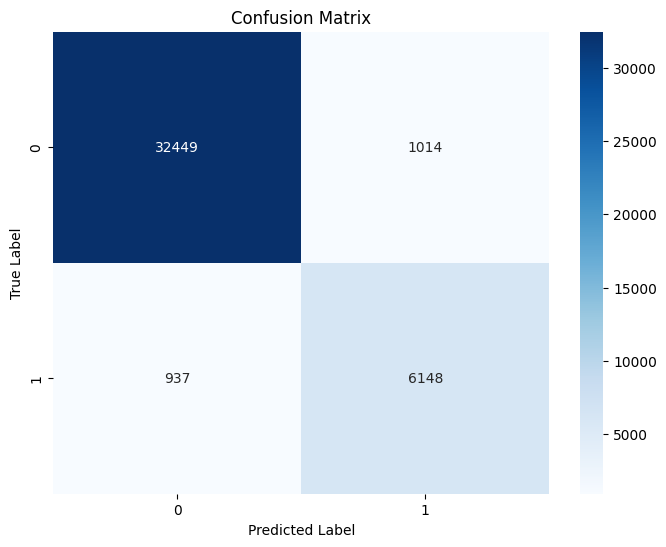

In [ ]:
# Show the confussion matrix of classifier 01 - Baseline Logistic Regression
plot_confusion_matrix(val_y_rf, best_rf_predictions)

In [ ]:
# Show the metrics of classifier 01 - Baseline Logistic Regression
compute_and_display_metrics(val_y_rf, best_rf_predictions)

      Metric     Score
0   Accuracy  0.951884
1  Precision  0.915177
2     Recall  0.918723
3   F1 Score  0.916937


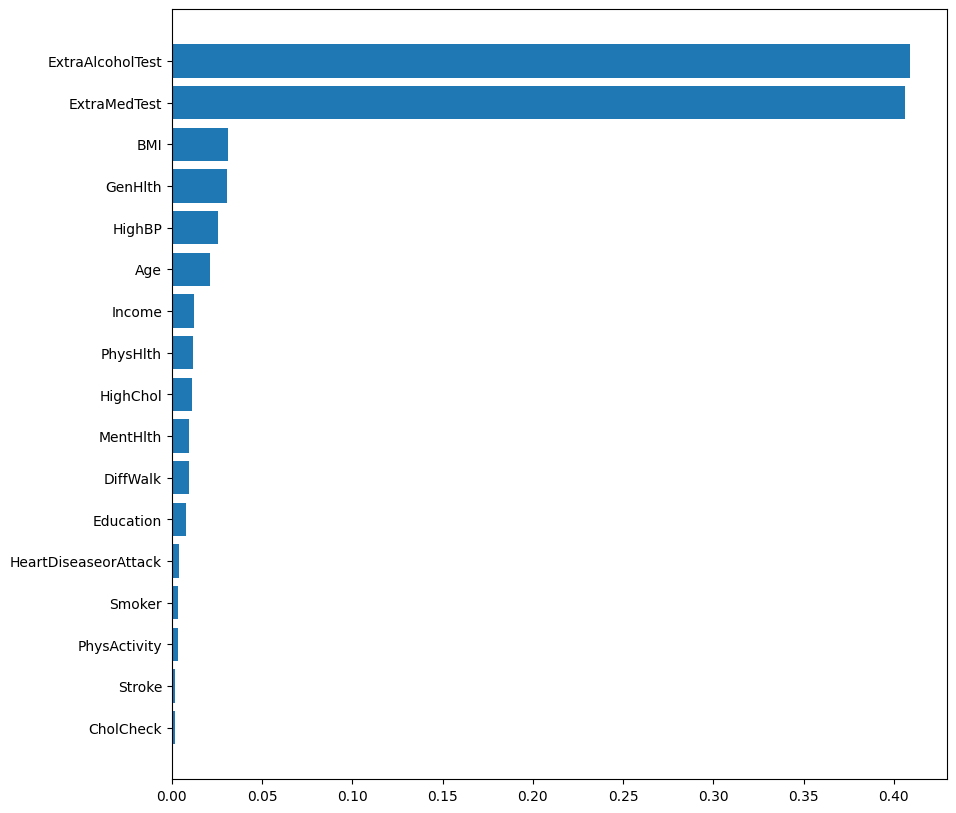

In [ ]:
# Plot the importance of features toward our baseline random forest model
best_rf_estimator_feature_importances = best_rf_estimator.feature_importances_
sorted_idx = best_rf_estimator_feature_importances.argsort()

plt.figure(figsize=(10,10))
plt.barh(df_train.columns[sorted_idx], best_rf_estimator_feature_importances[sorted_idx])
plt.show()

### 5. Evaluation

##### 5.1. Analysis on the models

Overall, we have applied insights from EDA phase on model implementation phase. Below is the detailed analysis on the performance of each model above:

* Baseline Logistic Regression: Provides a good baseline with decent accuracy, recall, precision, and F1-score. However, it might not be the best choice for imbalanced datasets due to its relatively lower F1-score.

* Fine-tuned Polynomial Logistic Regression: Shows improvement over the baseline logistic regression, especially in terms of precision and F1-score. The regularization parameter lambda and polynomial features seem to have a positive effect on the model's performance. However, their performances are limited due to linearity assumption on the relationships between independent variables as shown in the EDA phase.

* Baseline Decision Tree: Performs well across all metrics, particularly with high accuracy and F1-score. Decision trees are naturally inclined towards imbalanced datasets as they can partition the data based on minority class instances.

* Fine-tuned Decision Tree: Slight improvements over the baseline decision tree with optimized hyperparameters, especially in recall and F1-score. Tuning parameters like max_depth and min_samples_split can help control overfitting and improve generalization.

* Post-pruned Decision Tree: Despite pruning, the model maintains high accuracy and recall but suffers a bit in precision and F1-score. Pruning helps in avoiding overfitting, but it seems to have affected precision negatively in this case.

* Baseline Random Forest: Random forests generally perform well due to their ensemble nature, and this baseline model shows high accuracy and F1-score. The balanced_subsample option helps in handling class imbalance.

* Fine-tuned Random Forest: This model outperforms all others in terms of F1-score, which is the metric of interest due to the dataset's imbalance. The tuning of parameters like criterion and n_estimators has led to significant improvements in precision, recall, and F1-score.

##### 5.2. Implications and Potential Applications in Healthcare Settings

* The effectiveness of machine learning models in predicting diabetes onset holds significant implications for healthcare practitioners and patients alike. Early identification of individuals at risk enables timely intervention and personalized treatment strategies, thereby mitigating the adverse effects of diabetes-related complications.

* By leveraging predictive models, healthcare providers can prioritize resources and interventions for high-risk individuals, thereby optimizing healthcare delivery and improving patient outcomes. Moreover, the integration of machine learning-based predictive analytics into clinical practice empowers patients to take proactive measures towards disease prevention and management.

#### 5.3. Areas for Future Research and Improvements

While our study yielded promising results, there are several avenues for future research and improvement in predictive modeling for diabetes:

* Feature Engineering: Exploring additional health metrics and demographic information may enrich the predictive power of models, enhancing their ability to capture subtle nuances associated with diabetes development. Additionally, utilizing the feature importance and conclusions drawn after training the models, we can go back to the previous steps to continously choose the best features for this classification problem.

* Model Interpretability: Enhancing the interpretability of machine learning models can facilitate clinical decision-making and foster trust among healthcare practitioners. Techniques such as feature importance analysis and model visualization warrant further investigation in this context.

* Longitudinal Data Analysis: Incorporating longitudinal data spanning multiple time points can provide valuable insights into disease progression and temporal patterns, enabling proactive management strategies tailored to individual patient trajectories.

In conclusion, our study underscores the potential of machine learning in predicting diabetes onset, offering valuable insights into disease risk stratification and personalized healthcare delivery. Continued research efforts aimed at refining predictive models and translating findings into clinical practice are essential for advancing the field of predictive analytics in healthcare.

### 6. Prediction on unseen data

In [ ]:
# Load the testing dataset
df_test = pd.read_csv("/content/drive/MyDrive/RMIT/Sem A 2024/ML/ASM1/data_test.csv", encoding="utf-8")    # used for predicting un-seen data

# Load the prediction file (submission)
df_predictions = pd.read_csv("/content/drive/MyDrive/RMIT/Sem A 2024/ML/ASM1/s1234567_predictions.csv", encoding="utf-8")

In [ ]:
# Show the first 5 rows of testing dataset
df_test.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


In [ ]:
# Show the first 5 rows of dataset
df_predictions.head()

,Id,Status
0,202944,NaN
1,202945,NaN
2,202946,NaN
3,202947,NaN
4,202948,NaN


In [ ]:
# Before employing the optimal model to predict the target variable, it is essential to preprocess the testing dataset
# First, drop the independent variables that are not used to trained
preprocessed_df_test = df_test.drop(dropped_variables, axis=1)

# The indentifier and NaN target should be also excluded
df_test_X = preprocessed_df_test.drop(['Status', "Id"], axis=1)

# Let the optimal (Fine-tuned Random Forest) model
df_test_y = best_rf_estimator.predict(df_test_X)

# print the array of predictions
df_test_y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
# Insert the predictions into the predictions_df
df_predictions["Status"] = df_test_y

# View the dataframe again
df_predictions

,Id,Status
0,202944,0
1,202945,0
2,202946,0
3,202947,0
4,202948,0
...,...,...
50731,253675,1
50732,253676,0
50733,253677,1
50734,253678,1


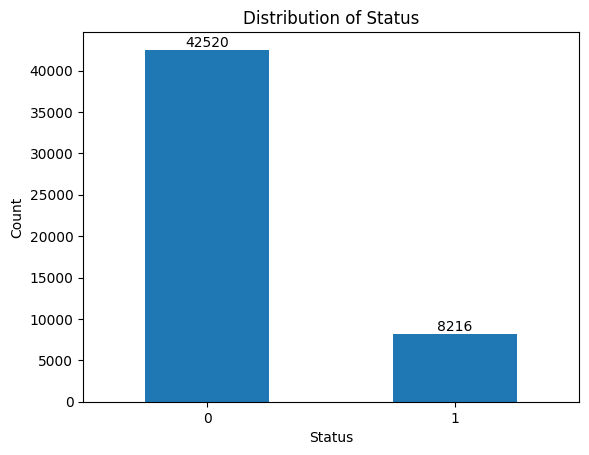

In [ ]:
# Plot the outputs
prediction_distribution = df_predictions["Status"].value_counts()

# Plotting the bar chart with counts displayed on top of each bar
ax = prediction_distribution.plot(kind='bar')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Displaying counts on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
# Save the prediction file for submission
df_predictions.to_csv("/content/drive/MyDrive/RMIT/Sem A 2024/ML/ASM1/s3924942_predictions.csv", encoding="utf-8", index=False)